In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

learning_rate = 0.01
iterations = 1000
iterations_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]

X_b = np.c_[np.ones((100,1)),X]
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta)
y_predict

array([[ 4.23306855],
       [10.01752467]])

In [100]:
def showMetrics(function, flag):
    theta = np.random.randn(2,1)

    if "sgd" in flag:
        X_b = np.c_[np.ones((len(X),1)),X]
        theta,cost_history = function(X_b,y,theta,learning_rate, iterations)
    elif "mbgd" in flag:
        theta,cost_history = function(X,y,theta,learning_rate, iterations)
    elif "gd" in flag:
        X_b = np.c_[np.ones((len(X),1)),X]
        theta,cost_history,theta_history = gradient_descent(X_b,y,theta,learning_rate, iterations)

    print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
    print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

In [47]:
def calc_cost(theta,X,y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2 * m) * np.sum(np.square(predictions-y))
    return cost

In [48]:
def gradient_descent(X,y, theta, learning_rate, iterations):
    m = len(y)
    
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 2))
    
    for it in range(iterations):
        prediction = np.dot(X,theta)
        theta = theta -(1/m) * learning_rate * ( X.T.dot((prediction - y)))
        theta_history[it,:] = theta.T
        cost_history[it]  = calc_cost(theta, X, y)
    
    return theta, cost_history, theta_history

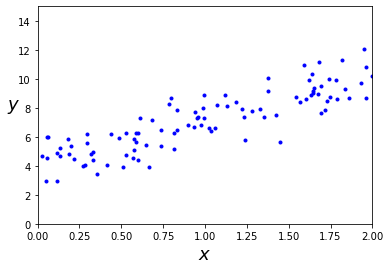

In [37]:
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])


[0, 2, 0, 15]

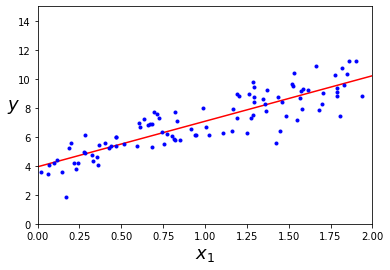

In [41]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])

In [57]:
X_b = np.c_[np.ones((100,1)),X]
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta)

[[4.23306855]
 [2.89222806]]


In [102]:
showMetrics(gradient_descent, "gd")

Theta0:          4.074,
Theta1:          3.023
Final cost/MSE:  4646.308


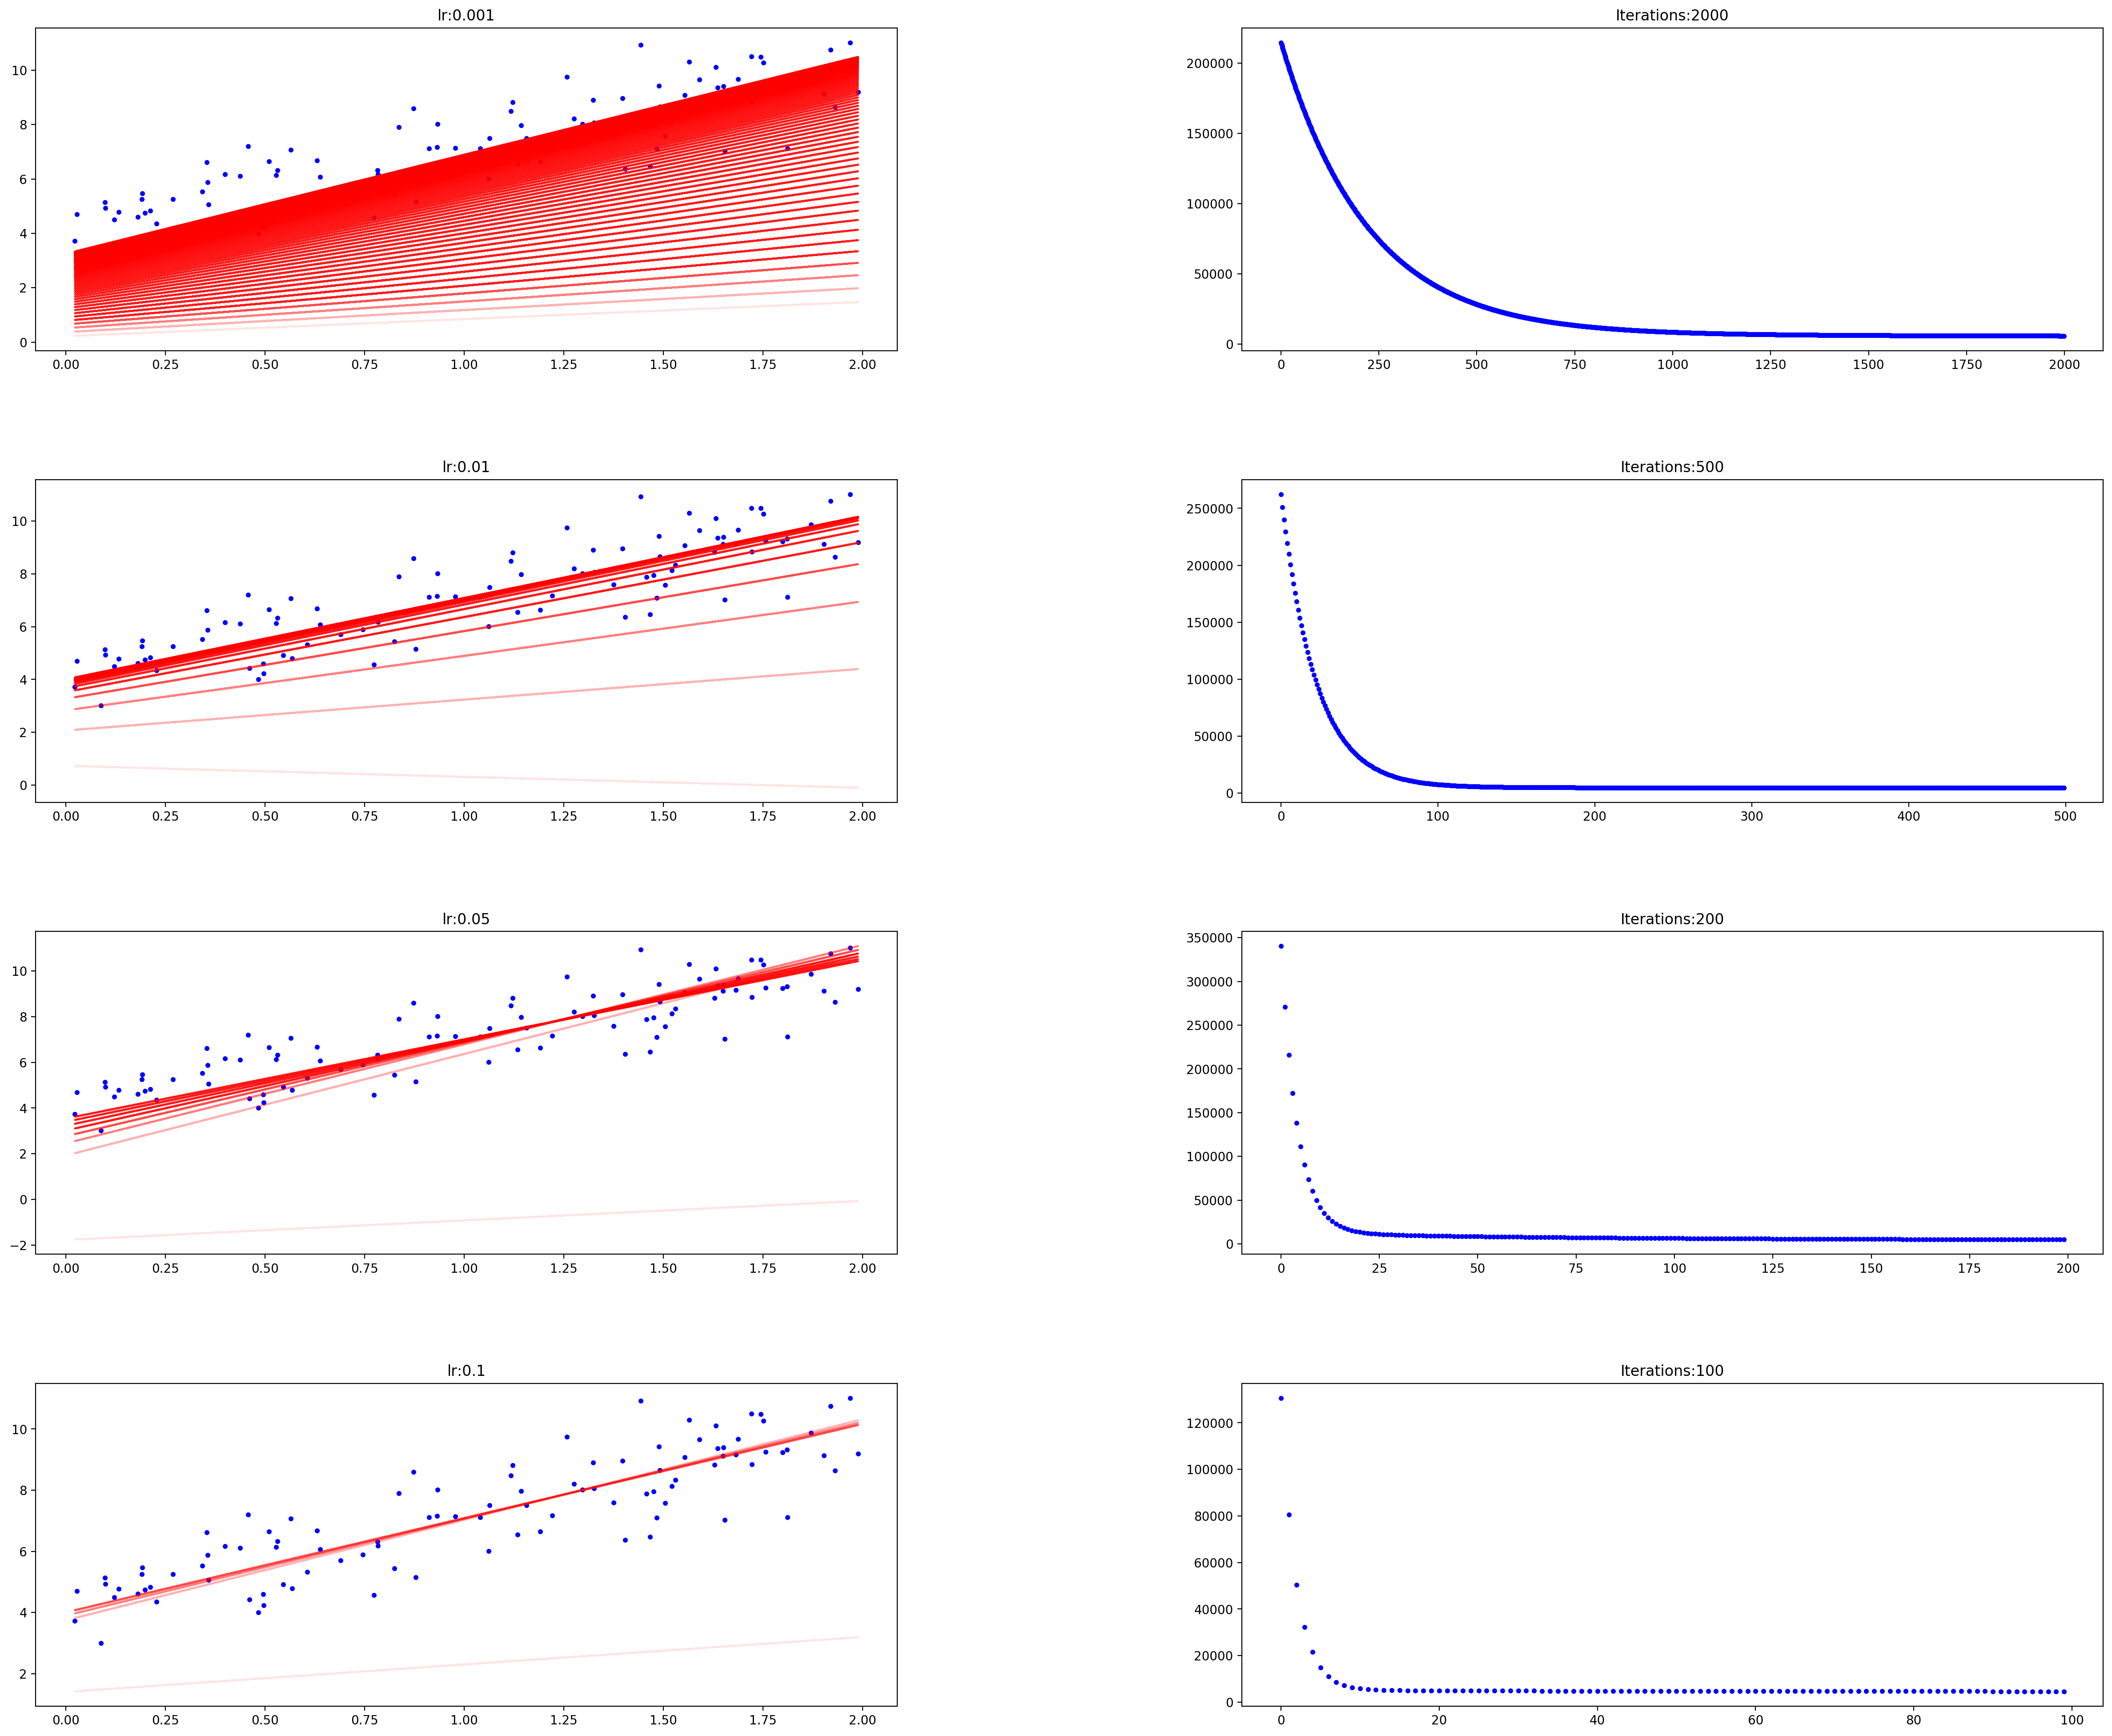

In [68]:
def plot_GD(n_iter,lr,ax,ax1=None):
     _ = ax.plot(X,y,'b.')
     theta = np.random.randn(2,1)

     tr =0.1
     cost_history = np.zeros(n_iter)
     for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
     if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')  



def init_Plot_GD():
    fig = plt.figure(figsize=(30,25),dpi=200)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    count =0
    for n_iter, lr in iterations_lr:
        count += 1

        ax = fig.add_subplot(4, 2, count)
        count += 1

        ax1 = fig.add_subplot(4,2,count)

        ax.set_title("lr:{}".format(lr))
        ax1.set_title("Iterations:{}".format(n_iter))
        plot_GD(n_iter,lr,ax,ax1)

init_Plot_GD()

In [65]:
def stocashtic_gradient_descent(X, y, theta,learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += calc_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [103]:
showMetrics(stocashtic_gradient_descent, "sgd")

Theta0:          3.828,
Theta1:          3.226
Final cost/MSE:  51.504


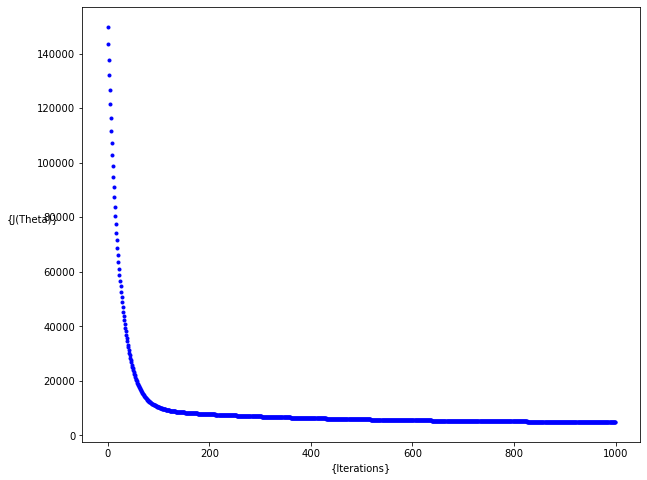

In [107]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(iterations),cost_history,'b.')

In [76]:
def minibatch_gradient_descent(X,y,theta,learning_rate,iterations,batch_size=20):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m) * learning_rate * ( X_i.T.dot((prediction - y_i)))
            cost += calc_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [104]:
showMetrics(minibatch_gradient_descent, "mbgd")

Theta0:          4.318,
Theta1:          2.822
Final cost/MSE:  924.502


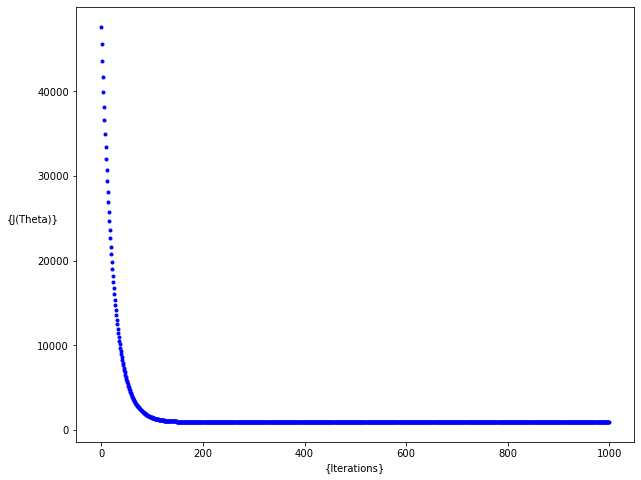

In [79]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(iterations),cost_history,'b.')